In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
college_prof = pd.read_csv("college_dataset_prof1.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'college_dataset_prof1.csv'

In [19]:
college_prof.info

<bound method DataFrame.info of        FICE                  College name State (postal code) Type  \
0      1061     Alaska Pacific University                  AK  IIB   
1      1063         Univ.Alaska-Fairbanks                  AK    I   
2      1065         Univ.Alaska-Southeast                  AK  IIA   
3     11462         Univ.Alaska-Anchorage                  AK  IIA   
4      1002     Alabama Agri.&Mech. Univ.                  AL  IIA   
...     ...                           ...                 ...  ...   
1156   3825  West Virginia Inst. of Tech.                  WV  IIB   
1157   3827      West Virginia University                  WV    I   
1158   3830  West Virginia Wesleyan Coll.                  WV  IIB   
1159   3831       Wheeling Jesuit College                  WV  IIB   
1160   3932         University of Wyoming                  WY    I   

      Avg_salary_full_prof  Avg_salary_asso_prof  Avg_salary_assi_prof  \
0                     1021                   867     

In [4]:
college_prof.head()

,FICE,College name,State (postal code),Type,Avg_salary_full_prof,Avg_salary_asso_prof,Avg_salary_assi_prof,Avg_salary_all_ranks,Avg. compensation (full prof.),Avg. compensation (associate prof.),Avg. compensation (assistant prof.),Avg. compensation (all ranks),No. of full prof.,No. of associate prof.,No. of assistant prof.,No. of instructors,No. of faculty - all ranks
0,1061,Alaska Pacific University,AK,IIB,454,382,362,382,567,485,471,487,6,11,9,4,32
1,1063,Univ.Alaska-Fairbanks,AK,I,686,560,432,508,914,753,572,677,74,125,118,40,404
2,1065,Univ.Alaska-Southeast,AK,IIA,533,494,329,415,716,663,442,559,9,26,20,9,70
3,11462,Univ.Alaska-Anchorage,AK,IIA,612,507,414,498,825,681,557,670,115,124,101,21,392
4,1002,Alabama Agri.&Mech. Univ.,AL,IIA,442,369,310,350,530,444,376,423,59,77,102,24,262


In [5]:
#Cleaning the data set.
#college_prof["State (postal code)"].isnull().values.any()
college_prof.drop(college_prof[college_prof["Avg_salary_full_prof"] == "*"].index, inplace=True)
college_prof.drop(college_prof[college_prof["Avg_salary_asso_prof"] == "*"].index, inplace=True)
college_prof.drop(college_prof[college_prof["Avg_salary_assi_prof"] == "*"].index, inplace=True)
college_prof.drop(college_prof[college_prof["Avg. compensation (full prof.)"] == "*"].index, inplace=True)
college_prof.drop(college_prof[college_prof["Avg. compensation (associate prof.)"] == "*"].index, inplace=True)
college_prof.drop(college_prof[college_prof["Avg. compensation (assistant prof.)"] == "*"].index, inplace=True)

In [6]:
lst = ["Avg_salary_full_prof", "Avg_salary_asso_prof", "Avg_salary_assi_prof", "Avg. compensation (full prof.)", "Avg. compensation (associate prof.)", "Avg. compensation (all ranks)"]
college_prof[lst] = college_prof[lst].apply(pd.to_numeric)

In [7]:
#print(college_prof)
college_prof["Avg_salary_full_prof"] = college_prof["Avg_salary_full_prof"] + college_prof["Avg. compensation (full prof.)"]
college_prof["Avg_salary_asso_prof"] = college_prof["Avg_salary_asso_prof"] + college_prof["Avg. compensation (associate prof.)"]
college_prof["Avg_salary_assi_prof"] = college_prof["Avg_salary_assi_prof"] + college_prof["Avg. compensation (all ranks)"]
#college_prof.head()

The compensation part includes research grants, extra bonuses etc. Hence, the average compensation was added to their respective average salaries and then analysed.

An interesting thing to note is that as the avg. salary increases, the the avg. compensation of the respective post also increases. This again re-enforces our decision of combining the two columns.

In [8]:
college_prof.head()

,FICE,College name,State (postal code),Type,Avg_salary_full_prof,Avg_salary_asso_prof,Avg_salary_assi_prof,Avg_salary_all_ranks,Avg. compensation (full prof.),Avg. compensation (associate prof.),Avg. compensation (assistant prof.),Avg. compensation (all ranks),No. of full prof.,No. of associate prof.,No. of assistant prof.,No. of instructors,No. of faculty - all ranks
0,1061,Alaska Pacific University,AK,IIB,1021,867,849,382,567,485,471,487,6,11,9,4,32
1,1063,Univ.Alaska-Fairbanks,AK,I,1600,1313,1109,508,914,753,572,677,74,125,118,40,404
2,1065,Univ.Alaska-Southeast,AK,IIA,1249,1157,888,415,716,663,442,559,9,26,20,9,70
3,11462,Univ.Alaska-Anchorage,AK,IIA,1437,1188,1084,498,825,681,557,670,115,124,101,21,392
4,1002,Alabama Agri.&Mech. Univ.,AL,IIA,972,813,733,350,530,444,376,423,59,77,102,24,262


In [9]:
college_prof.describe()

,FICE,Avg_salary_full_prof,Avg_salary_asso_prof,Avg_salary_assi_prof,Avg_salary_all_ranks,Avg. compensation (full prof.),Avg. compensation (associate prof.),Avg. compensation (all ranks),No. of full prof.,No. of associate prof.,No. of assistant prof.,No. of instructors,No. of faculty - all ranks
count,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000
mean,2980.878957,1182.792365,948.594972,891.545624,427.952514,656.412477,528.620112,536.497207,102.402235,77.622905,73.174115,13.410615,274.928305
std,2074.437800,267.967415,165.194039,169.393464,90.646865,150.922872,95.531295,118.505656,145.823663,90.965917,73.806000,20.069495,320.111752
min,1002.000000,596.000000,529.000000,489.000000,232.000000,319.000000,295.000000,290.000000,6.000000,6.000000,6.000000,0.000000,23.000000
25%,1904.250000,996.250000,833.250000,767.250000,362.000000,549.250000,462.000000,449.000000,22.000000,21.000000,24.000000,2.000000,77.000000
50%,2669.500000,1147.000000,939.000000,871.500000,415.000000,637.000000,522.000000,518.000000,45.000000,43.000000,45.000000,6.000000,146.000000
75%,3421.500000,1356.000000,1051.000000,995.750000,482.000000,755.000000,586.750000,606.750000,118.000000,101.000000,99.750000,15.000000,343.750000
max,29100.000000,2245.000000,1642.000000,1651.000000,866.000000,1236.000000,909.000000,1075.000000,997.000000,721.000000,510.000000,178.000000,2261.000000


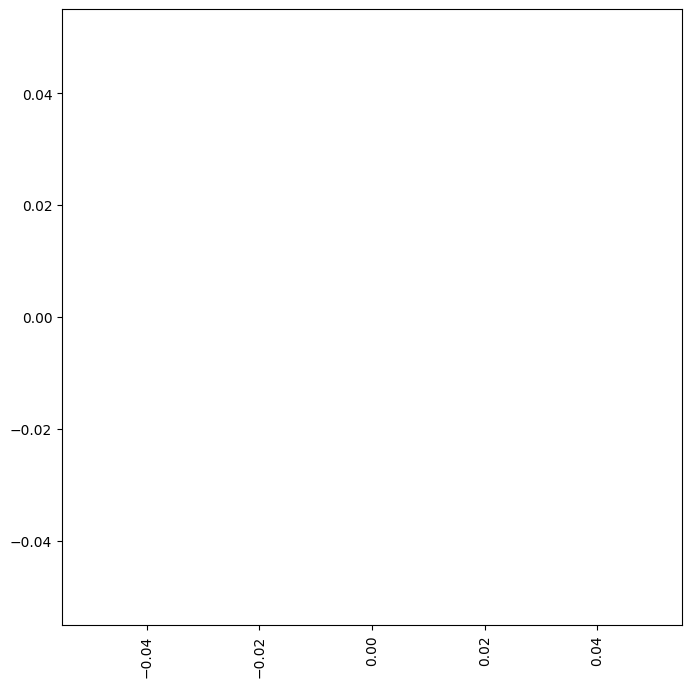

In [10]:
high_df = college_prof.query('Avg_salary_full_prof > 2700')

plt.figure(figsize=(8,8))

plt.scatter(high_df["College name"], high_df["Avg_salary_full_prof"])
plt.xticks(rotation = 90)
plt.show()

The plot shows that the colleges that occupy the top spots in the rankings year after year are the ones who pay generously to their professors. So if you want to be a professor in USA, these are the places to be in.

In [11]:
correlation = college_prof["Avg_salary_asso_prof"].corr(college_prof["Avg_salary_full_prof"])
print(f"The correlation between the parameters is {correlation}")

The correlation between the parameters is 0.9452685636589496


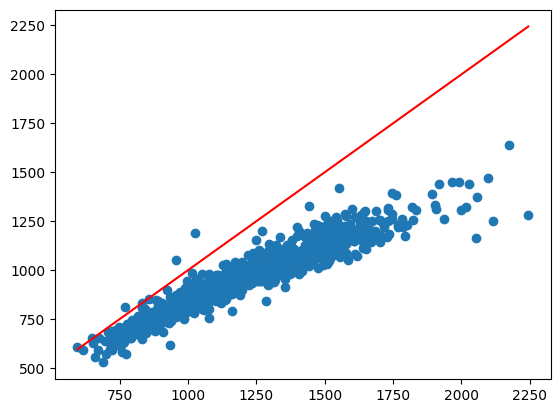

In [12]:
# plotting the data
plt.scatter(college_prof["Avg_salary_full_prof"], college_prof["Avg_salary_asso_prof"])
 
# This will fit the best line into the graph
plt.plot(np.unique(college_prof["Avg_salary_full_prof"]), np.poly1d(np.polyfit(college_prof["Avg_salary_full_prof"], college_prof["Avg_salary_full_prof"], 1))
         (np.unique(college_prof["Avg_salary_full_prof"])), color='red')

# plt.title('Correlation between acceptance rate and graduation rate')
# plt.xlabel('Acceptance rate')
# plt.ylabel('Graduation rate')

C:\Users\parag\AppData\Local\Temp\ipykernel_1264\1440880729.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = college_prof.corr()


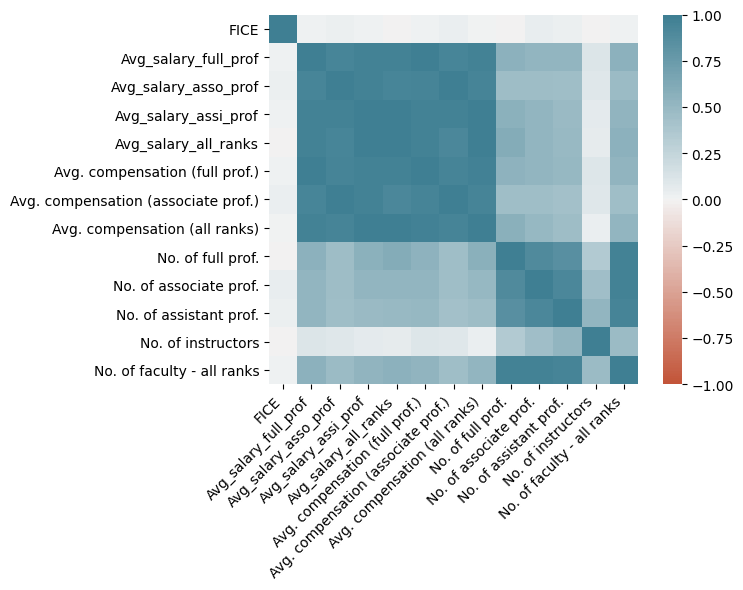

In [13]:


corr = college_prof.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right', 
);

In [14]:
college_prof.head()

,FICE,College name,State (postal code),Type,Avg_salary_full_prof,Avg_salary_asso_prof,Avg_salary_assi_prof,Avg_salary_all_ranks,Avg. compensation (full prof.),Avg. compensation (associate prof.),Avg. compensation (assistant prof.),Avg. compensation (all ranks),No. of full prof.,No. of associate prof.,No. of assistant prof.,No. of instructors,No. of faculty - all ranks
0,1061,Alaska Pacific University,AK,IIB,1021,867,849,382,567,485,471,487,6,11,9,4,32
1,1063,Univ.Alaska-Fairbanks,AK,I,1600,1313,1109,508,914,753,572,677,74,125,118,40,404
2,1065,Univ.Alaska-Southeast,AK,IIA,1249,1157,888,415,716,663,442,559,9,26,20,9,70
3,11462,Univ.Alaska-Anchorage,AK,IIA,1437,1188,1084,498,825,681,557,670,115,124,101,21,392
4,1002,Alabama Agri.&Mech. Univ.,AL,IIA,972,813,733,350,530,444,376,423,59,77,102,24,262


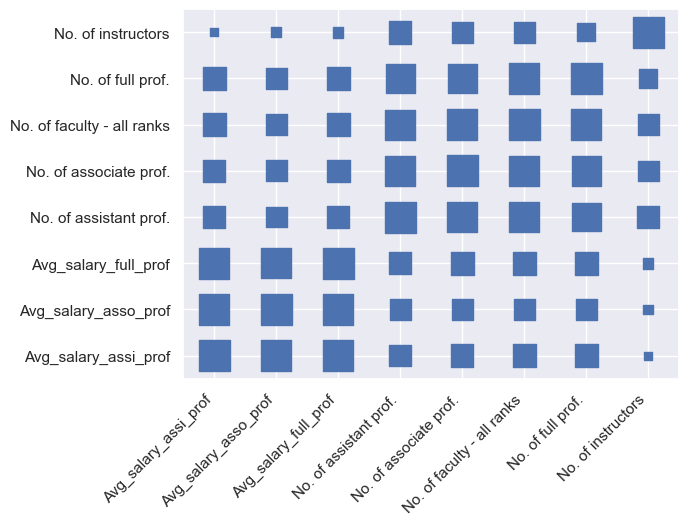

In [15]:

sns.set_theme(style="darkgrid")
# Step 1 - Make a scatter plot with square markers, set column names as labels

def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])

    


columns = ['Avg_salary_full_prof', 'Avg_salary_asso_prof', 'Avg_salary_assi_prof', 'No. of full prof.', 'No. of associate prof.', 'No. of assistant prof.', 'No. of instructors', 'No. of faculty - all ranks'] 
corr = college_prof[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)


ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)




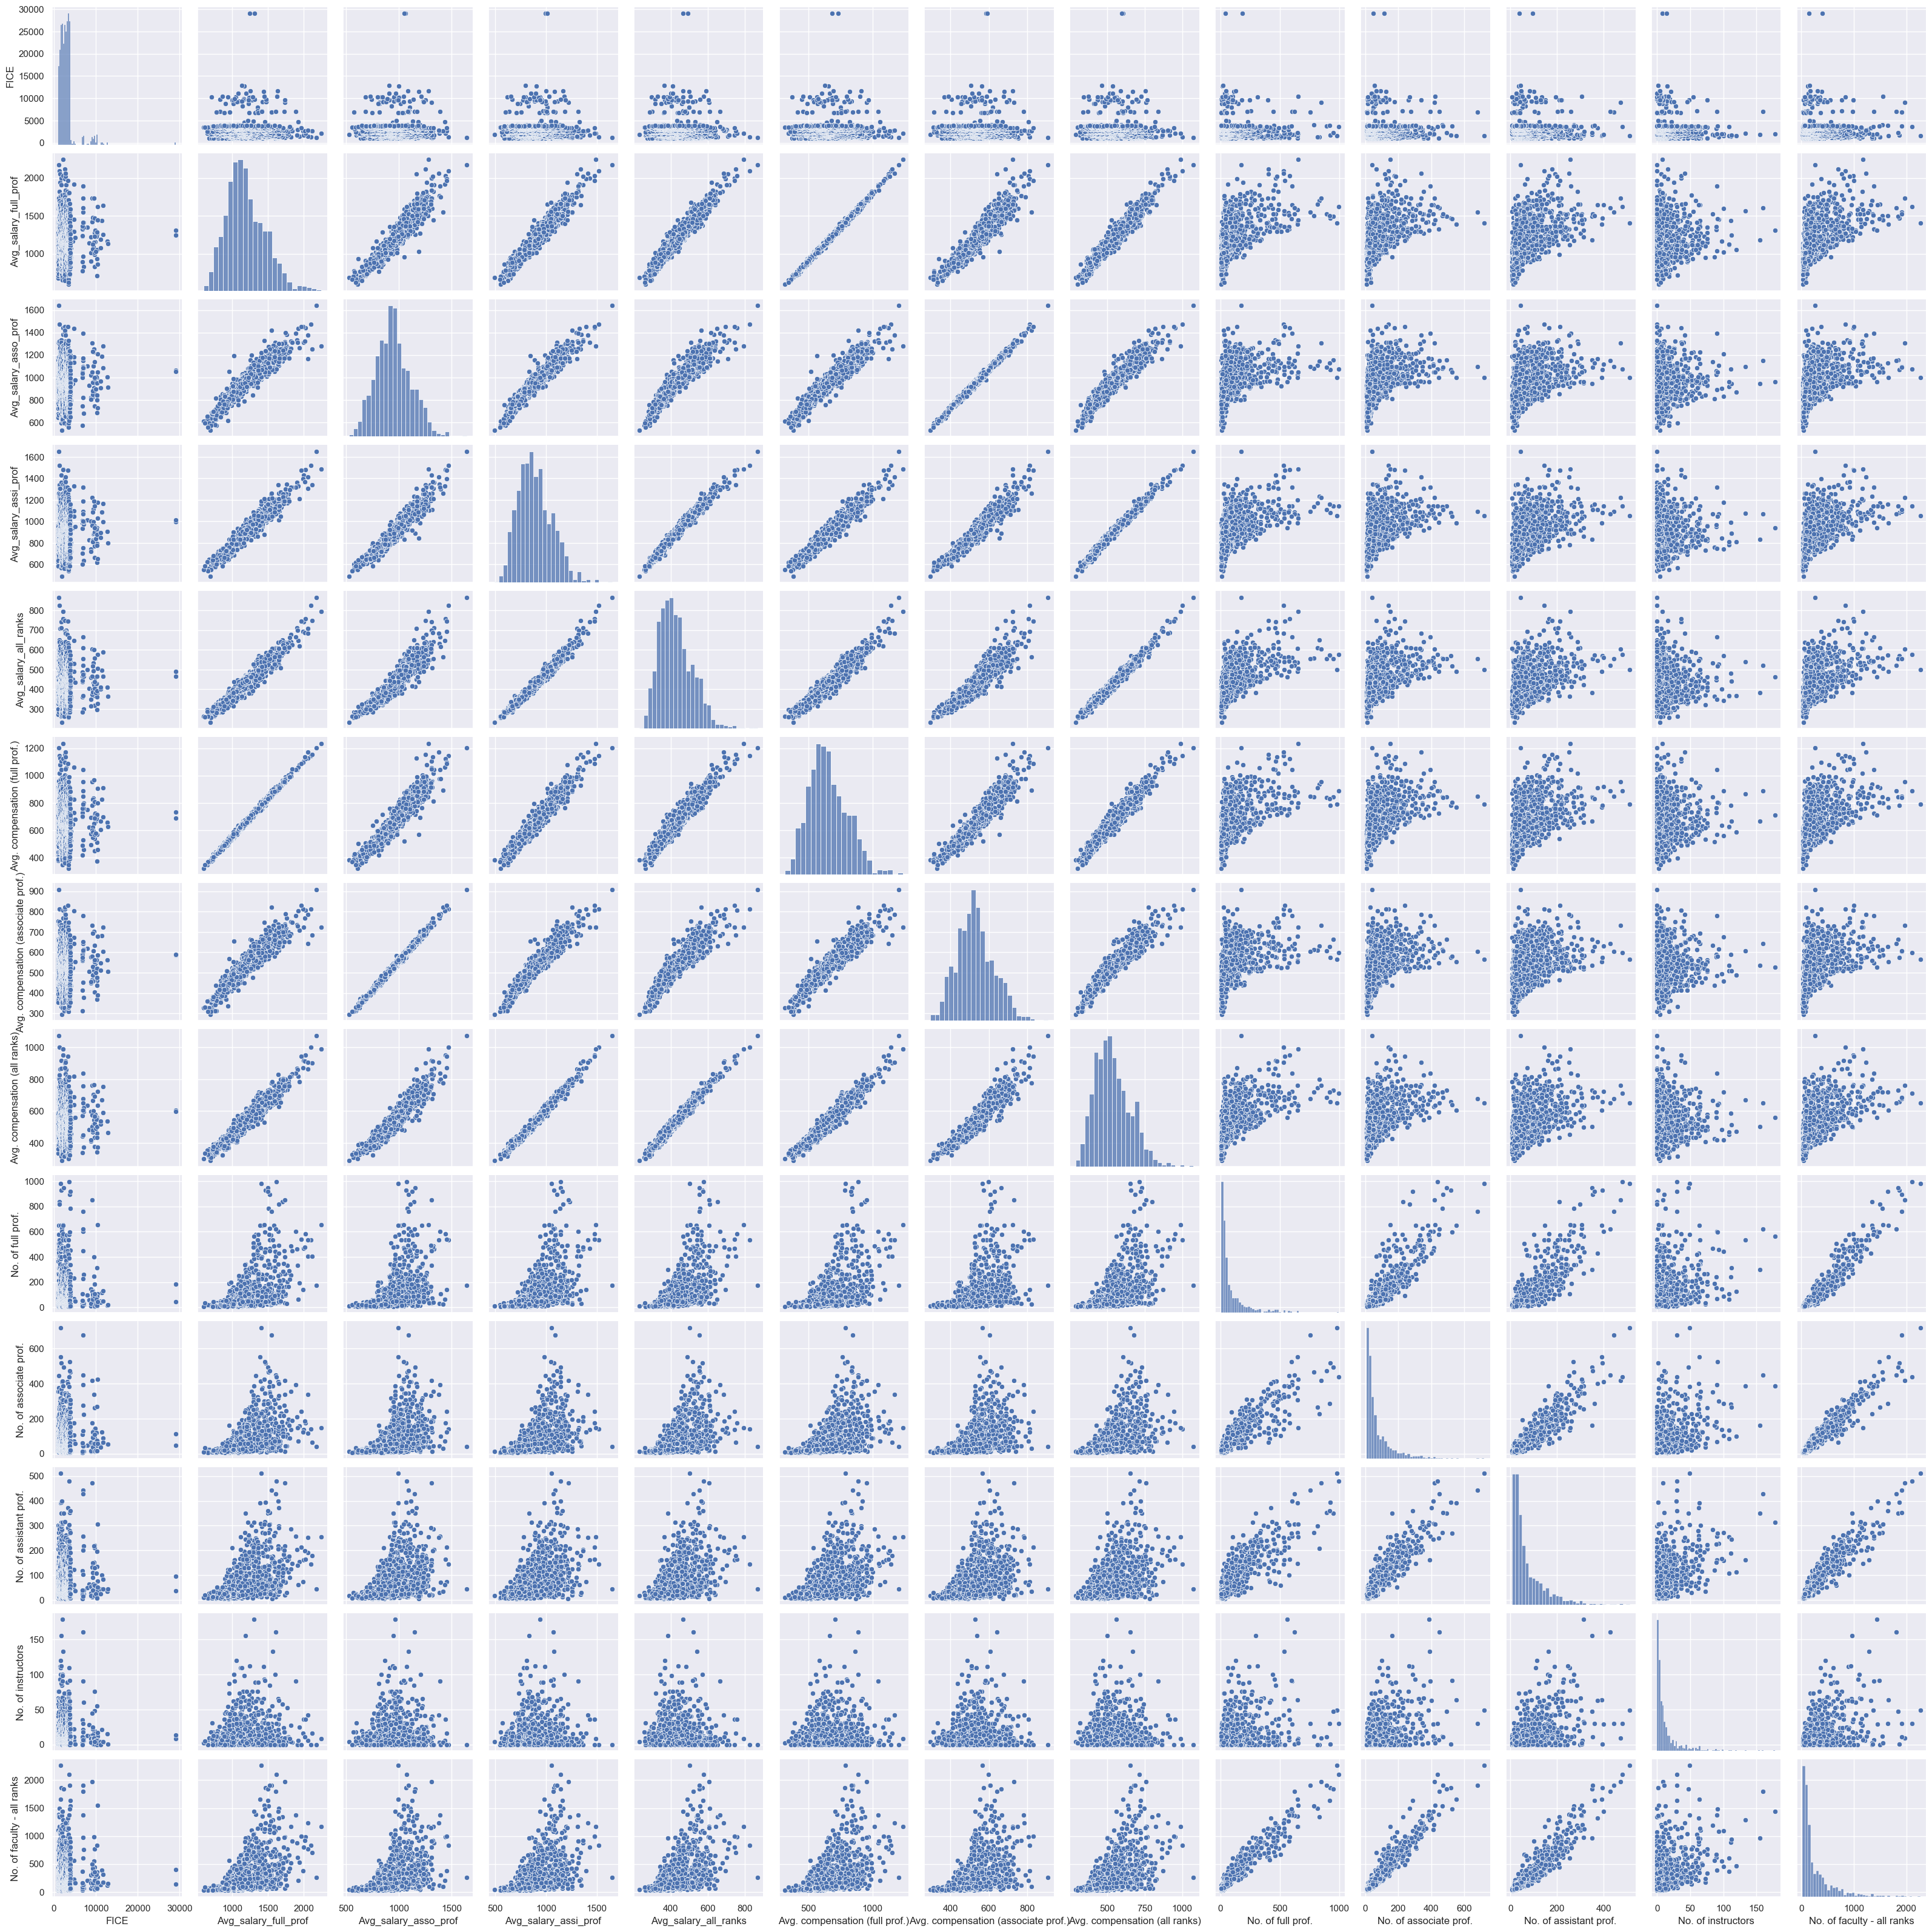

In [17]:
sns.pairplot(college_prof)

In [18]:
college_prof.head()

,FICE,College name,State (postal code),Type,Avg_salary_full_prof,Avg_salary_asso_prof,Avg_salary_assi_prof,Avg_salary_all_ranks,Avg. compensation (full prof.),Avg. compensation (associate prof.),Avg. compensation (assistant prof.),Avg. compensation (all ranks),No. of full prof.,No. of associate prof.,No. of assistant prof.,No. of instructors,No. of faculty - all ranks
0,1061,Alaska Pacific University,AK,IIB,1021,867,849,382,567,485,471,487,6,11,9,4,32
1,1063,Univ.Alaska-Fairbanks,AK,I,1600,1313,1109,508,914,753,572,677,74,125,118,40,404
2,1065,Univ.Alaska-Southeast,AK,IIA,1249,1157,888,415,716,663,442,559,9,26,20,9,70
3,11462,Univ.Alaska-Anchorage,AK,IIA,1437,1188,1084,498,825,681,557,670,115,124,101,21,392
4,1002,Alabama Agri.&Mech. Univ.,AL,IIA,972,813,733,350,530,444,376,423,59,77,102,24,262
